# <center> Ансамбли моделей
>**Ансамбль моделей** — это метод, в котором несколько алгоритмов (или вариации одного и того же) обучаются на одних данных, а итоговый прогноз строится на основе всех полученных от моделей прогнозов.  
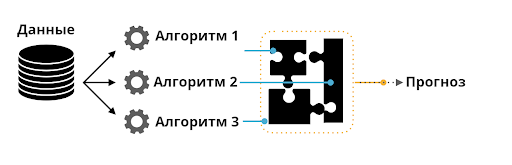

# <center>Бутстреппинг. Бэггинг
В основе бэггинга лежит статистический метод, который называется **бутстрепом (bootstrap)**. Идея бутстрепа заключается в генерации выборок размера n (бутстреп-выборок) из исходного датасета размера N путём случайного выбора элементов с повторениями в каждом из наблюдений.

Пусть у нас есть выборка из 12 клиентов компании: у каждого из них есть свой ID (от 1 до 12) и какие-то характеристики. Мы можем создавать из данной выборки множество различных новых выборок клиентов с новым количеством человек (в данном случае представлены выборки из пяти человек). При этом информацию про одного и того же клиента можно использовать повторно.

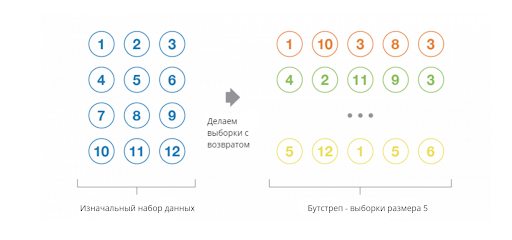

Это намного проще, чем находить новые выборки. По сути, мы собираем данные лишь единожды, а затем на их основе генерируем много выборок для обучения моделей. Это экономит огромные объёмы ресурсов и времени.

При некотором приближении можно считать, что получающиеся выборки являются независимыми и репрезентативными — **это важное допущение**.

Выборки можно назвать **независимыми**, если результаты испытаний и измерения, осуществляемые для одной выборки, никак не влияют на результаты, получаемые на другой выборке.

**Репрезентативность** заключается в соответствии характеристик выборки всей генеральной совокупности.

Бутстреп-выборки часто используются для оценки различных статистических показателей, например разброса или доверительного интервала.

Если вычислять статистические оценки на нескольких независимых выборках, то мы можем, например, оценить их математическое ожидание или разброс. Приведём пример того, как это происходит с точки зрения математики.

Допустим, у нас есть некоторая выборка $x=(5, 1, 3, 6, 4)$, и мы хотим оценить для неё математическое ожидание. Например, это может быть выборка количества товаров, которые приобретали покупатели нашего магазина, и мы хотим найти ожидаемое количество товаров, которое купит случайный клиент.

Конечно, мы без проблем можем его вычислить:

$ E(x) = \frac{5+1+3+6+4}{5} = 3.8 $
Однако это значение лишь на одной выборке, а мы хотели бы вычислить эту статистическую оценку на нескольких выборках и затем проанализировать разброс оценок.

Создаём несколько выборок с помощью бутстрепа и на каждой оцениваем математическое ожидание:  
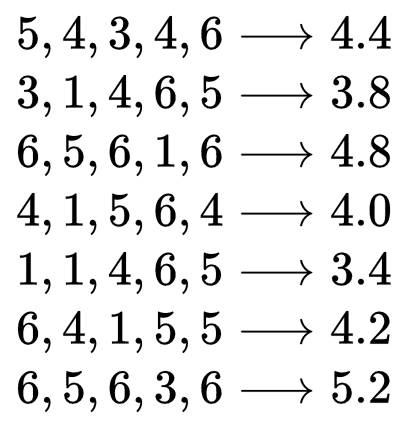

Получили ряд значений: $ 4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2 $. Теперь давайте найдём дисперсию для этого ряда.

In [4]:
import numpy as np

numbers = [4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2]
print('Дисперсия:', round(np.std(numbers)**2, 3))

Дисперсия: 0.317


Таким образом, мы понимаем, что если мы будем создавать различные новые выборки и вычислять для них средние значения, то для полученных значений дисперсия будет равна найденному вами выше значению. Заметьте: **мы узнали это, не собирая никаких новых данных**.

Формализуем только что проделанные действия математически:
1. Генерируем выборки. Необходимо создавать упорядоченные множества элементов, которые мы выбираем с возвратом(возможность брать элементы повторно) из некоторого имеющегося у нас множества:
    $$ \{ X_1, \dots, X_N \} $$
2. Повторяем несколько раз процедуру генерации выборки:
    $$  X^*_b = \Big(X^*_{b1}, \dots, X^*_{bN} \Big), \text{ где } 1 \leq b \leq B $$
3. Считаем интересующую нас статистику по каждой выборке:
    $$ T^*_1 = T(X^*_1), \dots, T^*_B = T(X^*_B) $$
4. Получаем бутстрепную оценку для интересующей нас статистики по этой выборке статистик. Например, для дисперсии она будет вычисляться так:
    $$ \widehat{D}_{boot} = \frac{1}{B} \sum^B_{b=1} T^{*2}_b - \Big(\frac{1}{B}\sum^B_{b=1} T^*_b \Big)^2

# <center>Bias и Variance
Прежде чем перейти непосредственно к ансамблям моделей, нам необходимо повторить *bias-variance decomposition*, или, как его называют по-русски, «разложение ошибки на смещение и разброс». Оно очень полезно для анализа ансамблей моделей.

>**Смещение** — это разница между математическим ожиданием для прогноза и реальным значением:
$$ \text{Bias}[\hat{f}(x)] = E[\hat{f}(x)] - y $$
* $ E[\hat{f}(x)] $ — математическое ожидание для прогноза
* $y$ — реальное значение функции.

>**Смысл смещения** — способность получить лучшую среди всех возможных моделей, то есть максимально точные прогнозы.

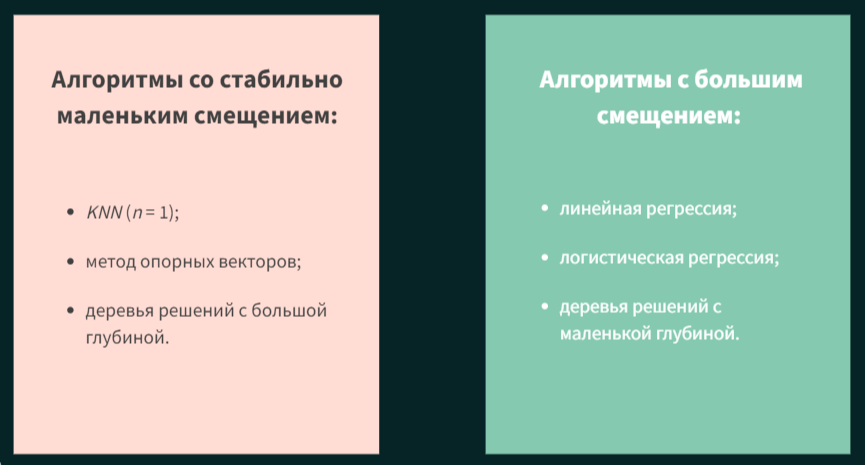

Также значение смещения часто называют **ошибкой смещения** или **ошибкой из-за смещения**.

Если у модели большое смещение, это значит, что ошибка будет достаточно велика из-за слишком сильного упрощения модели.

>**Разброс** — это величина разницы в результатах обучения модели на разных выборках:
$$ \text{Var}[\hat{f}(x)] = E \bigg[ \big( E[\hat{f}(x)] - \hat{f}(x) \big)^2 \bigg] $$
С математической точки зрения разброс модели определяется как математическое ожидание квадрата разницы ожидаемого прогноза и реализованного прогноза модели.

Разброс характеризует устойчивость модели к изменениям в обучающей выборке:

* Если результат сильно зависит от того, какие объекты присутствуют в выборке, разброс будет большим.
* Если алгоритм работает стабильно вне зависимости от особенностей выборки, разброс будет маленьким.

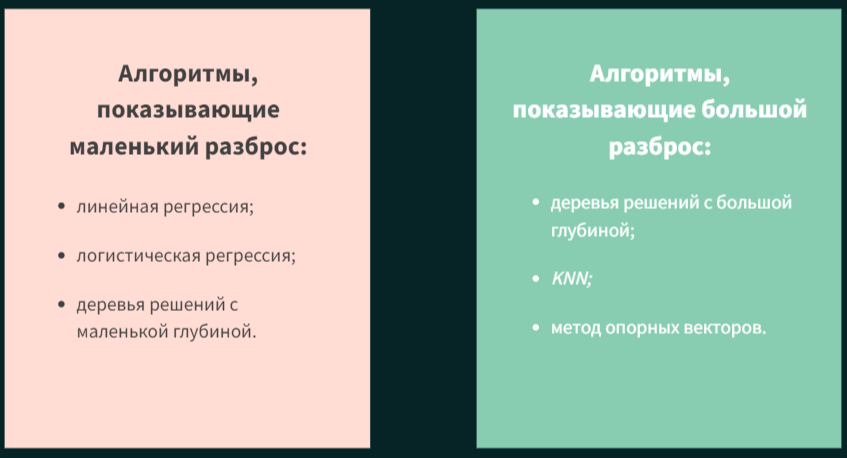

Рассмотрим иллюстрацию того, как сдвиг и разброс влияют на качество предсказания. На рисунке ниже вы видите цель (красный круг), в которую мы хотим попасть.

Есть четыре ситуации:  
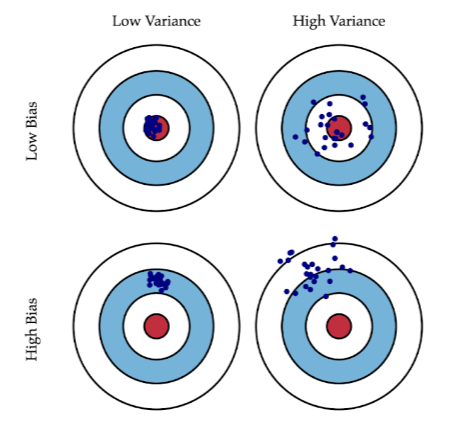

В моделях машинного обучения принцип тот же, только в качестве центра мишени выступает минимально возможная ошибка.

Когда говорят про разложение на *bias* и *variance*, то часто упоминают некую **точку баланса**:
* Если модель очень простая, с маленьким количеством параметров, то, скорее всего, у неё будет очень большое смещение, но маленький разброс.
* Если модель очень сложная, со множеством параметров, у неё будет большой разброс и маленькое смещение.

Схематично эти зависимости можно изобразить следующим образом (это схема не для конкретной модели, а лишь иллюстрация тенденций):

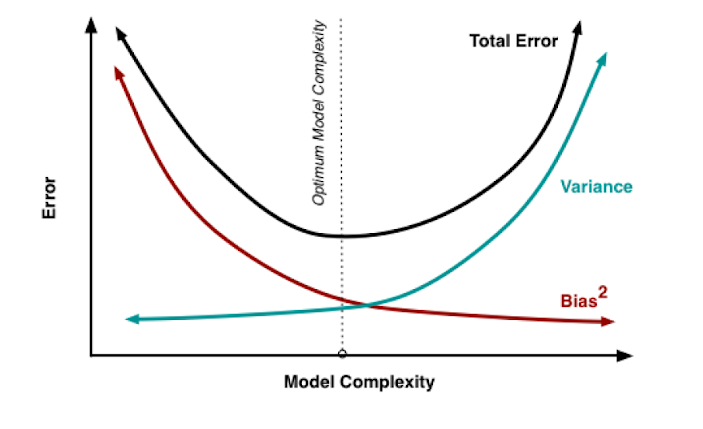

На графике выше по оси абсцисс отложена сложность модели (**Model Complexity**), а по оси ординат — ошибка (**Error**). Также изображены смещение ($\text{Bias}^2$), разброс (**Variance**) и ошибка (**Total Error** — сумма смещения и разброса).

Как вы можете видеть, есть некоторая оптимальная точка, в которой разброс и смещение небольшие, а ошибка минимальна. Именно эта точка нас и интересует.

# <center>Бэггинг
При построении моделей всегда есть вероятность, что при обучении на других данных получились бы другие результаты. Для того чтобы нивелировать такую вероятность, можно использовать бэггинг.

Его идея состоит в том, что мы берём несколько **независимых моделей(моделей, обученных  на независимых выборках)** и усредняем полученные по ним результаты. Таким образом мы получаем модель, имеющую меньший разброс, так как при её построении мы учли несколько моделей.

Как уже было сказано, в реальности получить много независимых выборок слишком сложно, так как найти столько данных обычно невозможно. Поэтому мы используем бутстреп-выборки, о которых говорили в начале юнита.

>Важно отметить, что при бэггинге размер каждой бутстреп-выборки должен совпадать с размером исходной выборки.

Схематично процесс бэггинга можно представить следующим образом:  
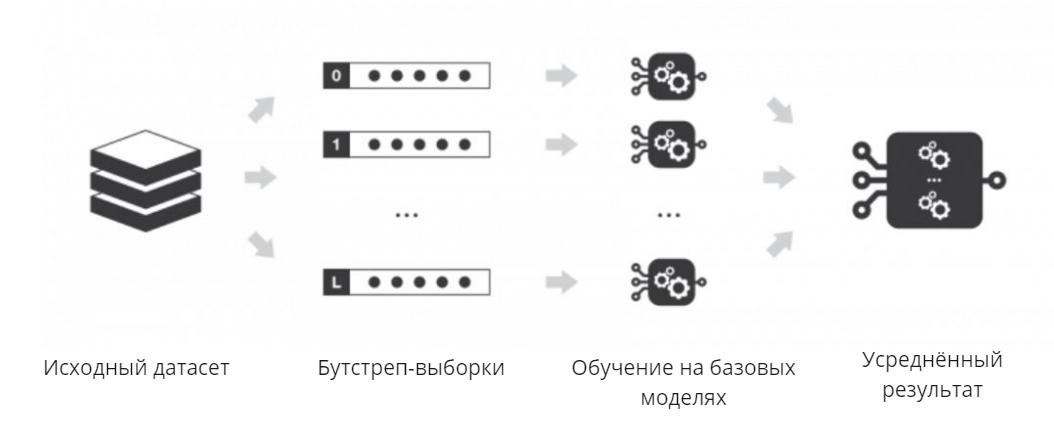

Пусть у нас есть некоторая выборка, и мы с помощью бутстрепа генерируем из неё ещё $B$ выборок:
$$ X_1, \dots, X_B $$
После этого мы определяем много базовых алгоритмов (всего $B$ моделей — по числу выборок) и обучаем каждый базовый алгоритм $a_i(x)$ на своей выборке. После этого получаем итоговый результат:
$$ a(x) = \frac{1}{B} \sum^B_{i=1} a_i(x) $$
* Если мы рассматриваем задачу **классификации**, то, по сути, модели «голосуют» за свой класс.
* Если мы рассматриваем задачу **регрессии**, то результат — просто среднее арифметическое прогнозов по всем моделям.

Получается, что путём усреднения предсказаний линейных регрессий мы смогли уменьшить среднеквадратичную ошибку в $K$ раз (количество независимых моделей).

Однако тут важно отметить, что при решении прикладных задач эффект будет не таким выраженным, так как здесь мы использовали предположение о полной независимости ошибок, а в реальной жизни такое случается редко.

Доказано, что бэггинг **не ухудшает показатель смещения модели**, то есть смещение у ансамбля ровно такое же, как и у одного базового алгоритма.

В общем случае разброс бэггинга будет выражаться следующим образом:
$$ \frac{1}{K} (\text{Var} \space a_n(x)) + \text{Cov}(a_n(x), a_m(x)) $$
В данном выражении через $a_n(x)$ обозначен один из базовых алгоритмов, а за $a_m(x)$ — другой базовый алгоритм.

Из этого следует, что если модели (в данной формуле — базовые модели $a_n(x)$ и $a_m(x)$) независимы, то разброс для ансамбля типа бэггинг будет в $K$ раз меньше, чем разброс у отдельной модели.

**Резюмируем:**
* Бэггинг даёт уменьшение ошибки в $K$ раз по сравнению с одиночной моделью.
* Бэггинг не уменьшает смещение по сравнению с одиночной моделью.
* Бэггинг уменьшает разброс в $K$ раз по сравнению с одиночной моделью.


# <center>Случайный лес